In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

aviation_df = pd.read_csv('data/AviationData.csv', encoding='latin-1', parse_dates=True)
us_state_codes_df = pd.read_csv('data/USState_Codes.csv');

/Users/samuelwhitehurst/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
aviation_df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
us_state_codes_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [4]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
us_state_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [6]:
aviation_df.loc[aviation_df['Injury.Severity'] != aviation_df['Injury.Severity'].str.contains('Fatal')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Aviation Data Exploration

It appears that columns 6, 7, 28 have multiple data types, so we explored them specifically. We determined that columns 6 and 7 are not necessary for our analysis, because we have a 'Location' column that we can work with instead, so we dropped the 'Latitude' and 'Longitude' columns. Column 28 is not needed because we care about the overall safety of the flight not when the accident or inccident occured.

For ceratin columns, a value_count() was enough to recognize that the data contained in that column would not be something valbuale for us moving forward, so many of those columns were ultimately dropped. For other columns, more exstensive analysis was needed, such as identifying repeated values that we coul dthen cross reference with other related columns to provide our group with more insight. These columns required additional action items that we will detail in the next section.

In [7]:
aviation_df['Latitude'].value_counts()

332739N      19
335219N      18
334118N      17
32.815556    17
039405N      16
             ..
343140N       1
383118N       1
028280N       1
38.9625       1
42.175        1
Name: Latitude, Length: 25592, dtype: int64

In [8]:
aviation_df['Longitude'].value_counts()

0112457W       24
1114342W       18
1151140W       17
-104.673056    17
-112.0825      16
               ..
0122140W        1
0003476W        1
0903849W        1
0824724W        1
0952419W        1
Name: Longitude, Length: 27156, dtype: int64

In [9]:
aviation_df['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [10]:
aviation_df['Country'].value_counts()

United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
                  ...  
Niger                 1
Liberia               1
Pacific Ocean         1
Ivory Coast           1
BLOCK 651A            1
Name: Country, Length: 219, dtype: int64

In [11]:
aviation_df['Model'].value_counts()

152                     2367
172                     1756
172N                    1164
PA-28-140                932
150                      829
                        ... 
MAC-145B                   1
Tailwind W8                1
Glasair Super II-S         1
SPORTSMAN GS2              1
ELA AVIACION 10 ECLI       1
Name: Model, Length: 12318, dtype: int64

In [12]:
aviation_df['Make'].value_counts()

Cessna               22227
Piper                12029
CESSNA                4922
Beech                 4330
PIPER                 2841
                     ...  
Preece                   1
Fronsman                 1
Gay                      1
Ervin                    1
HASTINGS THOMAS G        1
Name: Make, Length: 8237, dtype: int64

In [13]:
aviation_df['Make'].dtypes

dtype('O')

In [14]:
aviation_df.loc[aviation_df['Injury.Severity'] == 'Minor']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
87284,20220106104496,Accident,CEN22LA094,2022-01-01,"Port Aransas, TX",United States,274830N,0097456W,RAS,MUSTANG BEACH,...,Skydiving,SAFESIX AVIATION LLC,0.0,1.0,0.0,0.0,VMC,NaN,The loss of engine power due to carburetor ici...,14-06-2022
87289,20220103104480,Accident,WPR22LA072,2022-01-03,"Upland, CA",United States,034642N,1174115W,CCB,CABLE,...,Personal,NEXTGEN FLIGHT ACADEMY INC,0.0,1.0,0.0,0.0,VMC,NaN,The pilots loss of airplane control during a ...,22-06-2022
87311,20220111104517,Accident,ERA22FA105,2022-01-11,"Drexel Hill, PA",United States,395651N,0751812W,NaN,NaN,...,NaN,AIR METHODS CORP,0.0,1.0,0.0,3.0,VMC,NaN,NaN,20-01-2022
87333,20220119104542,Accident,ANC22LA013,2022-01-16,"Winnemucca, NV",United States,405436N,1174739W,WMC,Winnemucca Municipal Airport,...,Personal,NaN,0.0,1.0,0.0,0.0,VMC,NaN,The pilots failure to ensure the airplanes w...,14-06-2022
87335,20220118104534,Accident,WPR22LA081,2022-01-18,"Scottsdale, AZ",United States,333352N,1114717W,NaN,NaN,...,Personal,THIRD STEP 2 LLC,0.0,1.0,0.0,0.0,VMC,NaN,NaN,08-02-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,20221227106496,Accident,WPR23LA074,2022-12-17,"Cottonwood, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,27-12-2022
88881,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,NaN,NaN,NaN,NaN,...,Personal,Pilot,0.0,1.0,0.0,0.0,NaN,NaN,NaN,22-12-2022
88882,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,NaN,NaN,NaN,...,Instructional,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,27-12-2022
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022


In [15]:
aviation_df.loc[aviation_df['Injury.Severity'] == 'Serious']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
87307,20220110104510,Accident,WPR22LA076,2022-01-09,"Los Angeles, CA",United States,341516N,1182433W,WHP,WHITEMAN,...,Personal,MARK JENKINS,0.0,0.0,1.0,0.0,VMC,NaN,NaN,21-01-2022
87316,20220113104523,Accident,ERA22LA107,2022-01-12,"Winter Haven, FL",United States,002838N,0814241W,NaN,NaN,...,Instructional,"Jack Brown's Seaplane Base, Inc",0.0,0.0,2.0,0.0,VMC,NaN,NaN,26-01-2022
87322,20220116104529,Accident,WPR22LA080,2022-01-14,"Spanish Fork, UT",United States,040751N,0111398W,SPK,SPANISH FORK MUNI/WOODHOUSE FL,...,Personal,NaN,0.0,0.0,1.0,0.0,VMC,NaN,NaN,26-01-2022
87325,20220118104533,Accident,ANC22LA012,2022-01-15,"Hana, HI",United States,204744N,0156118W,HNM,Hana Airport,...,Personal,NaN,0.0,1.0,1.0,0.0,VMC,NaN,NaN,27-01-2022
87334,20220207104606,Accident,DCA22WA074,2022-01-16,"Okayama City,",Japan,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,1.0,55.0,NaN,NaN,NaN,25-02-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88827,20221128106368,Accident,ERA23LA071,2022-11-27,"Gaithersburg, MD",United States,039114N,0771119W,GAI,MONTGOMERY COUNTY AIRPARK,...,Personal,MFC CORP,0.0,0.0,2.0,0.0,IMC,NaN,NaN,06-12-2022
88855,20221212106439,Accident,DCA23LA093,2022-12-08,"Newark, NJ",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,3.0,1.0,175.0,NaN,NaN,NaN,12-12-2022
88866,20221213106448,Accident,CEN23LA062,2022-12-12,"Carrollton, TX",United States,NaN,NaN,NaN,NaN,...,Personal,Wright Wiley Singleton,0.0,0.0,2.0,0.0,NaN,NaN,NaN,15-12-2022
88872,20221214106459,Accident,GAA23WA042,2022-12-14,"Happy Valley-Goose Bay, OF",Canada,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,2.0,0.0,NaN,NaN,NaN,20-12-2022


In [16]:
aviation_df.loc[aviation_df['Injury.Severity'] != aviation_df['Injury.Severity'].str.contains('Fatal')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [17]:
aviation_df['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

## Distilling Data via Dropping Unnecessary Columns + Rows

After analyzing each column in the Aviation dataframe, the group decided that certain columns were extraneous and would not be necessary as we moved forward cleaning the data. 

In [18]:
aviation_dropcol1 = aviation_df.drop(columns=
                                     ['Event.Id', 'Investigation.Type', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Number.of.Engines',
                                     'FAR.Description', 'Schedule', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'])

In [19]:
aviation_dropcol1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Accident.Number         88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Registration.Number     87572 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Amateur.Built           88787 non-null  object 
 11  Engine.Type             81812 non-null  object 
 12  Purpose.of.flight       82697 non-null  object 
 13  Air.carrier             16648 non-null  object 
 14  Total.Fatal.Injuries    77488 non-null

### Filtering non Amateur.Built entries

In [20]:
# Only taking the parts of aviation_dropcol1 where `Amateur.Built` column == 'No'
aviation_droprow1 = aviation_dropcol1[aviation_dropcol1['Amateur.Built'] == 'No']

In [21]:
# Dropping the `Amateur.Built` column as we no longer need it (every entry is now a non-Amateur build)
aviation_dropcol2 = aviation_droprow1.drop(columns=['Amateur.Built'])

In [22]:
aviation_dropcol2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80312 entries, 0 to 88888
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Accident.Number         80312 non-null  object 
 1   Event.Date              80312 non-null  object 
 2   Location                80265 non-null  object 
 3   Country                 80092 non-null  object 
 4   Injury.Severity         79313 non-null  object 
 5   Aircraft.damage         77165 non-null  object 
 6   Aircraft.Category       28721 non-null  object 
 7   Registration.Number     79101 non-null  object 
 8   Make                    80266 non-null  object 
 9   Model                   80245 non-null  object 
 10  Engine.Type             73648 non-null  object 
 11  Purpose.of.flight       74242 non-null  object 
 12  Air.carrier             15652 non-null  object 
 13  Total.Fatal.Injuries    70155 non-null  float64
 14  Total.Serious.Injuries  69228 non-null

#### Consolidating columns 13-15 into one feature

Here we add a new feature, `Human.Injury`, as a categorization of the injury values, as a new column.

In [23]:
# Categorizing the fatal column.
fatal_category = (aviation_dropcol2['Total.Fatal.Injuries'] > 0).apply(lambda x: 'Fatal' if x else np.nan)

In [24]:
# Categorizing the serious column.
serious_category = (aviation_dropcol2['Total.Serious.Injuries'] > 0).apply(lambda x: 'Serious' if x else np.nan)

In [25]:
# Categorizing the minor column.
minor_category = (aviation_dropcol2['Total.Minor.Injuries'] > 0).apply(lambda x: 'Minor' if x else np.nan)

In [26]:
# Joining the categorized columns into one column
injuries_categorized = pd.concat([fatal_category, serious_category, minor_category], axis=1)

In [27]:
# Adding the new feature onto the original dataframe
aviation_dropcol2['Human.Injury'] = injuries_categorized.apply(lambda row: next((x for x in row if pd.notna(x)), np.nan), axis=1)

In [28]:
aviation_dropcol2['Human.Injury'].value_counts()

Fatal      15424
Minor      10089
Serious     9670
Name: Human.Injury, dtype: int64

In [29]:
# Creating a new reference variable for the original dataframe.
aviation_addfeature1 = aviation_dropcol2.copy()

#### Comparing with Injury.Severity

In [30]:
aviation_addfeature1[['Injury.Severity', 'Human.Injury']]

,Injury.Severity,Human.Injury
0,Fatal(2),Fatal
1,Fatal(4),Fatal
2,Fatal(3),Fatal
3,Fatal(2),Fatal
4,Fatal(1),Fatal
...,...,...
88884,Minor,Serious
88885,NaN,NaN
88886,Non-Fatal,NaN
88887,NaN,NaN


We are dropping the Injury.Severity column after comparing it to our feature 'Human.Injury', because the 'Human.Injury column is a more conservative estimate of the human injury inpact of these safety events.

In [31]:
# Fill NaN's with 'Unknown' in the 'Human.Injury' column.
aviation_addfeature1['Human.Injury'] = aviation_addfeature1['Human.Injury'].fillna('Unknown')

We set the null values to 'Unknown' to more accurately compare them with the 'Unknown' values of the 'Aircraft.damage' column, which led us to deleting out any records that had 'Unknown' as the value for each column.

In [32]:
aviation_dropcol3 = aviation_addfeature1.drop(columns=['Injury.Severity'])
aviation_dropcol3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80312 entries, 0 to 88888
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Accident.Number         80312 non-null  object 
 1   Event.Date              80312 non-null  object 
 2   Location                80265 non-null  object 
 3   Country                 80092 non-null  object 
 4   Aircraft.damage         77165 non-null  object 
 5   Aircraft.Category       28721 non-null  object 
 6   Registration.Number     79101 non-null  object 
 7   Make                    80266 non-null  object 
 8   Model                   80245 non-null  object 
 9   Engine.Type             73648 non-null  object 
 10  Purpose.of.flight       74242 non-null  object 
 11  Air.carrier             15652 non-null  object 
 12  Total.Fatal.Injuries    70155 non-null  float64
 13  Total.Serious.Injuries  69228 non-null  float64
 14  Total.Minor.Injuries    69755 non-null

In [33]:
for category in aviation_addfeature1['Aircraft.damage'].value_counts().index:
    display(aviation_addfeature1[aviation_addfeature1['Aircraft.damage'] == category][['Aircraft.damage', 'Human.Injury']].head())

,Aircraft.damage,Human.Injury
5,Substantial,Minor
7,Substantial,Unknown
8,Substantial,Unknown
9,Substantial,Minor
10,Substantial,Unknown


,Aircraft.damage,Human.Injury
0,Destroyed,Fatal
1,Destroyed,Fatal
2,Destroyed,Fatal
3,Destroyed,Fatal
4,Destroyed,Fatal


,Aircraft.damage,Human.Injury
23,Minor,Unknown
40,Minor,Unknown
80,Minor,Unknown
119,Minor,Unknown
131,Minor,Unknown


,Aircraft.damage,Human.Injury
85371,Unknown,Unknown
85404,Unknown,Unknown
85405,Unknown,Unknown
85435,Unknown,Unknown
85443,Unknown,Unknown


In [34]:
aviation_addfeature1[aviation_addfeature1['Aircraft.damage'] == 'Unknown']['Human.Injury'].value_counts()

Unknown    75
Fatal      23
Serious     9
Minor       9
Name: Human.Injury, dtype: int64

In [35]:
aviation_addfeature1['Aircraft.damage'].value_counts()

Substantial    57928
Destroyed      16407
Minor           2714
Unknown          116
Name: Aircraft.damage, dtype: int64

In [36]:
aviation_droprow2 = aviation_addfeature1[~((aviation_addfeature1['Human.Injury'] == 'Unknown') & (aviation_addfeature1['Aircraft.damage'] == 'Unknown'))]

In [37]:
aviation_droprow2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80237 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Accident.Number         80237 non-null  object 
 1   Event.Date              80237 non-null  object 
 2   Location                80190 non-null  object 
 3   Country                 80017 non-null  object 
 4   Injury.Severity         79265 non-null  object 
 5   Aircraft.damage         77090 non-null  object 
 6   Aircraft.Category       28646 non-null  object 
 7   Registration.Number     79026 non-null  object 
 8   Make                    80191 non-null  object 
 9   Model                   80170 non-null  object 
 10  Engine.Type             73643 non-null  object 
 11  Purpose.of.flight       74213 non-null  object 
 12  Air.carrier             15630 non-null  object 
 13  Total.Fatal.Injuries    70080 non-null  float64
 14  Total.Serious.Injuries  69153 non-null

In [38]:
aviation_droprow2['Human.Injury'].value_counts()

Unknown    45054
Fatal      15424
Minor      10089
Serious     9670
Name: Human.Injury, dtype: int64

In [39]:
aviation_droprow2['Aircraft.damage'].value_counts()

Substantial    57928
Destroyed      16407
Minor           2714
Unknown           41
Name: Aircraft.damage, dtype: int64

In [40]:
aviation_addfeature2 = aviation_droprow2.copy()
aviation_addfeature2['Human.Injury.Numeric'] = aviation_droprow2['Human.Injury'].apply(lambda x: 1 if x=='Unknown' else 2 if x=='Minor' else 3 if x=='Serious' else 4)

In [41]:
aviation_addfeature2['Human.Injury.Numeric'].value_counts()

1    45054
4    15424
2    10089
3     9670
Name: Human.Injury.Numeric, dtype: int64

In [42]:
aviation_addfeature2['Aircraft.damage.Numeric'] = aviation_droprow2['Aircraft.damage'].apply(lambda x: 1 if x=='Unknown' else 2 if x=='Minor' else 3 if x=='Substantial' else 4)

In [43]:
aviation_addfeature2['Aircraft.damage.Numeric'].value_counts()

3    57928
4    19554
2     2714
1       41
Name: Aircraft.damage.Numeric, dtype: int64

In [44]:
aviation_addfeature2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80237 entries, 0 to 88888
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accident.Number          80237 non-null  object 
 1   Event.Date               80237 non-null  object 
 2   Location                 80190 non-null  object 
 3   Country                  80017 non-null  object 
 4   Injury.Severity          79265 non-null  object 
 5   Aircraft.damage          77090 non-null  object 
 6   Aircraft.Category        28646 non-null  object 
 7   Registration.Number      79026 non-null  object 
 8   Make                     80191 non-null  object 
 9   Model                    80170 non-null  object 
 10  Engine.Type              73643 non-null  object 
 11  Purpose.of.flight        74213 non-null  object 
 12  Air.carrier              15630 non-null  object 
 13  Total.Fatal.Injuries     70080 non-null  float64
 14  Total.Serious.Injuries

In [45]:
weights = (.75, .25)

In [46]:
aviation_addfeature3 = aviation_addfeature2.copy()

aviation_addfeature3['Human.Injury.Numeric'] * aviation_addfeature3['Aircraft.damage.Numeric']

0        16
1        16
2        16
3        16
4        16
         ..
88884    12
88885     4
88886     3
88887     4
88888    12
Length: 80237, dtype: int64

In [47]:
aviation_addfeature3['Human.Injury.Numeric'] * weights[0] + aviation_addfeature3['Aircraft.damage.Numeric'] * weights[1]

0        4.00
1        4.00
2        4.00
3        4.00
4        4.00
         ... 
88884    3.25
88885    1.75
88886    1.50
88887    1.75
88888    3.25
Length: 80237, dtype: float64

In [48]:
aviation_addfeature3['Danger.Scale'] = aviation_addfeature3['Human.Injury.Numeric'] * weights[0] + aviation_addfeature3['Aircraft.damage.Numeric'] * weights[1]

In [49]:
aviation_addfeature3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80237 entries, 0 to 88888
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accident.Number          80237 non-null  object 
 1   Event.Date               80237 non-null  object 
 2   Location                 80190 non-null  object 
 3   Country                  80017 non-null  object 
 4   Injury.Severity          79265 non-null  object 
 5   Aircraft.damage          77090 non-null  object 
 6   Aircraft.Category        28646 non-null  object 
 7   Registration.Number      79026 non-null  object 
 8   Make                     80191 non-null  object 
 9   Model                    80170 non-null  object 
 10  Engine.Type              73643 non-null  object 
 11  Purpose.of.flight        74213 non-null  object 
 12  Air.carrier              15630 non-null  object 
 13  Total.Fatal.Injuries     70080 non-null  float64
 14  Total.Serious.Injuries

In [51]:
aviation_addfeature3.head()

,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Human.Injury,Human.Injury.Numeric,Aircraft.damage.Numeric,Danger.Scale
0,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,...,Personal,NaN,2.0,0.0,0.0,0.0,Fatal,4,4,4.0
1,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,...,Personal,NaN,4.0,0.0,0.0,0.0,Fatal,4,4,4.0
2,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,...,Personal,NaN,3.0,NaN,NaN,NaN,Fatal,4,4,4.0
3,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,...,Personal,NaN,2.0,0.0,0.0,0.0,Fatal,4,4,4.0
4,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,...,Personal,NaN,1.0,2.0,NaN,0.0,Fatal,4,4,4.0


<AxesSubplot:ylabel='Frequency'>

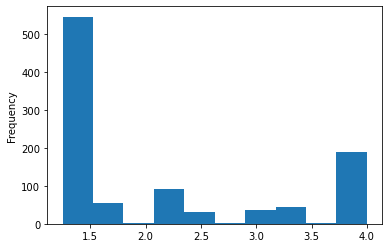

In [50]:
aviation_addfeature3['Danger.Scale'].iloc[:1000].plot.hist()